# **ML Lab 02**

# **Task 01**

In [ ]:
import pandas as pd

df1 = pd.read_csv("Lab2 D1A.csv")
df2 = pd.read_csv("Lab2 D1B.csv")
df3 = pd.read_csv("Lab2 D1C.csv")

combined_df = pd.concat([df1, df2], ignore_index=True)

combined_df = combined_df.drop_duplicates()

combined_df.to_csv("data.csv", index=False)

comboAC = df1.merge(df3, how="inner", on="county")

comboAC.to_csv("comboAC.csv", index=False)


# **Task 02**

In [1]:
import pandas as pd

customizedData = pd.DataFrame({
    'fid': [101, 102, 103, 104, 105],
    'county': ['Phillipines', 'Brazil', 'Uganda', 'Dubai', 'Egypt'],
    'size': ['small', 'medium', 'high', 'medium', 'small'],
    'direction': ['North', 'South', 'East', 'West', 'North'],
    'timing': ['full time', 'part time', 'full time', 'part time', 'full time'],
    'type': ['urban', 'rural', 'urban', 'rural', 'urban'],
    'rating': [4.5, 3.2, 4.0, 2.8, 5.0]
})

customizedData.to_csv("customizedData.csv", index=False)

print("Customized Data Shape:", customizedData.shape)
print("Customized Data Columns:", customizedData.columns)


Customized Data Shape: (5, 7)
Customized Data Columns: Index(['fid', 'county', 'size', 'direction', 'timing', 'type', 'rating'], dtype='object')


In [3]:
df1 = pd.read_csv("Lab2 D1A.csv")
df2 = pd.read_csv("Lab2 D1B.csv")
df3 = pd.read_csv("Lab2 D1C.csv")

original_combined = df1.merge(df2, how="inner", on="county")
original_combined = original_combined.merge(df3, how="inner", on="county")

print("Before merging with customizedData:")
print("Records:", original_combined.shape[0])
print("Features:", original_combined.shape[1])

modifiedData = original_combined.merge(customizedData, how="inner", on="county")

print("\nAfter merging with customizedData:")
print("Records:", modifiedData.shape[0])
print("Features:", modifiedData.shape[1])

modifiedData.to_csv("modifiedData.csv", index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'Lab2 D1A.csv'

# **Task 03**

Importing libraries

In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.utils import resample


# **Data Preprocessing**

In [5]:
df = pd.read_csv("train.csv")
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


# **Data Analysis**

(C) Correlation between given variables

                             var3     var38     var15  imp_op_var39_comer_ult1
var3                     1.000000  0.000071 -0.004452                 0.005989
var38                    0.000071  1.000000  0.006497                 0.012546
var15                   -0.004452  0.006497  1.000000                 0.094762
imp_op_var39_comer_ult1  0.005989  0.012546  0.094762                 1.000000


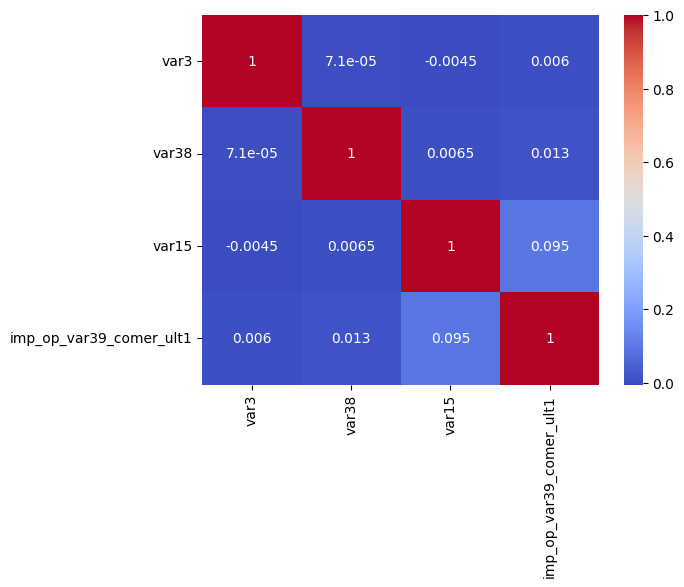

In [7]:
corr_vars = ['var3', 'var38', 'var15', 'imp_op_var39_comer_ult1']
corr_matrix = df[corr_vars].corr()
print(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

(D) Linearity Check

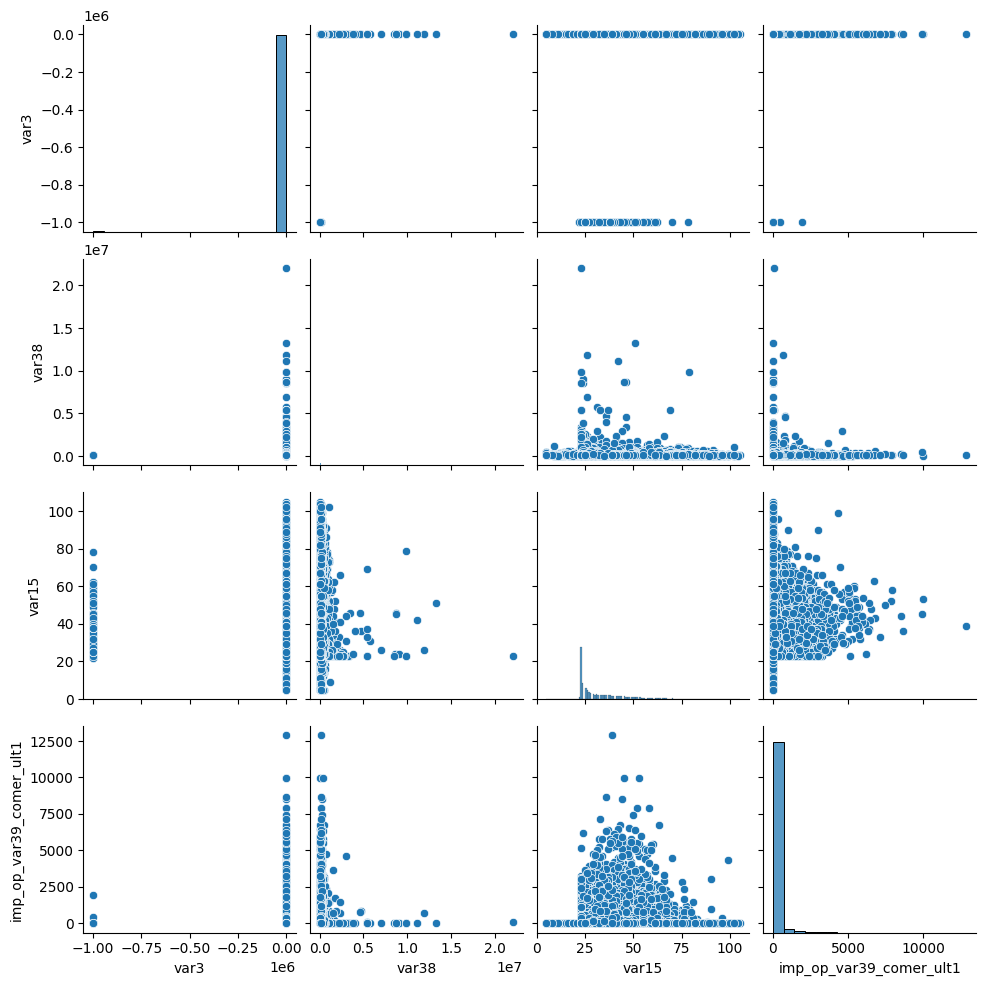

In [8]:
sns.pairplot(df[corr_vars])
plt.show()

(E) Missing Values + Imputation

In [9]:

print(df.isnull().sum())

imputer = SimpleImputer(strategy="mean")
df[corr_vars] = imputer.fit_transform(df[corr_vars])


ID                         0
var3                       0
var15                      0
imp_ent_var16_ult1         0
imp_op_var39_comer_ult1    0
                          ..
saldo_medio_var44_hace3    0
saldo_medio_var44_ult1     0
saldo_medio_var44_ult3     0
var38                      0
TARGET                     0
Length: 371, dtype: int64


(F) Multi-variable Explorations

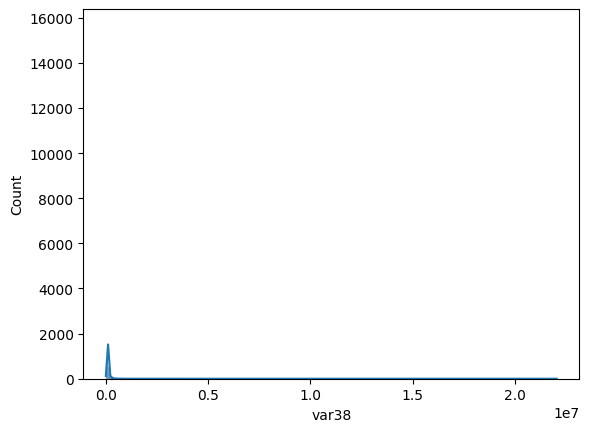

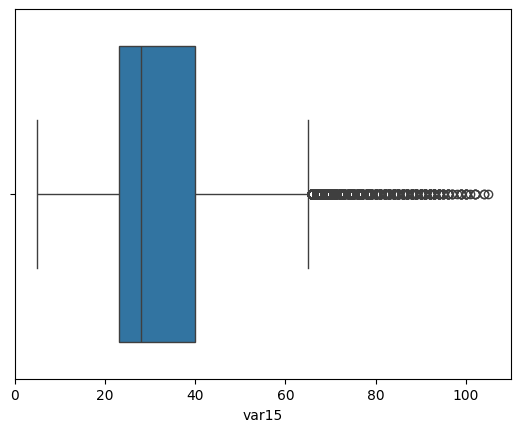

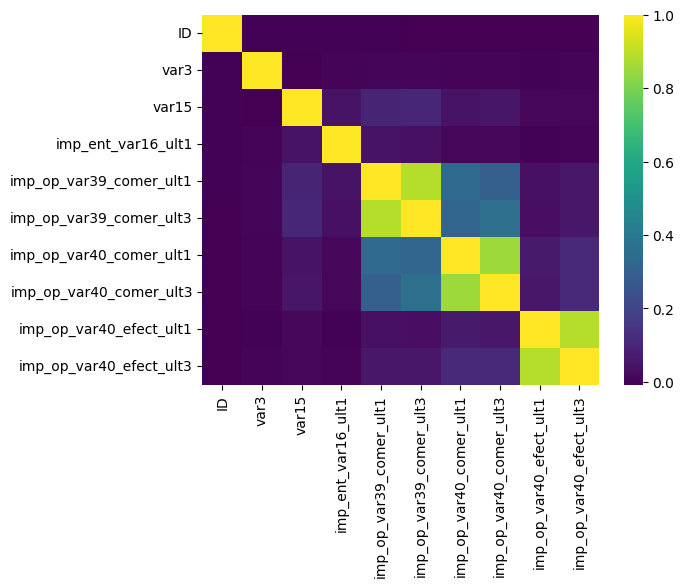

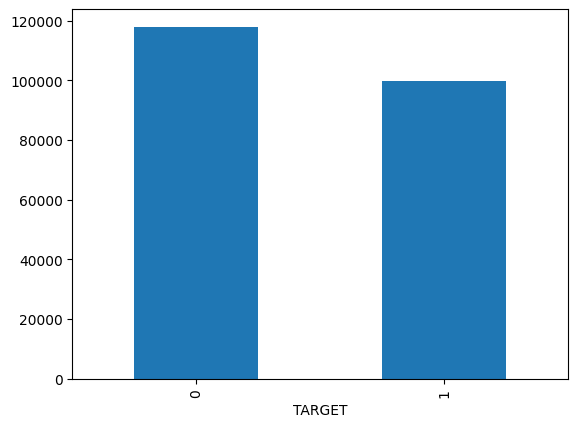

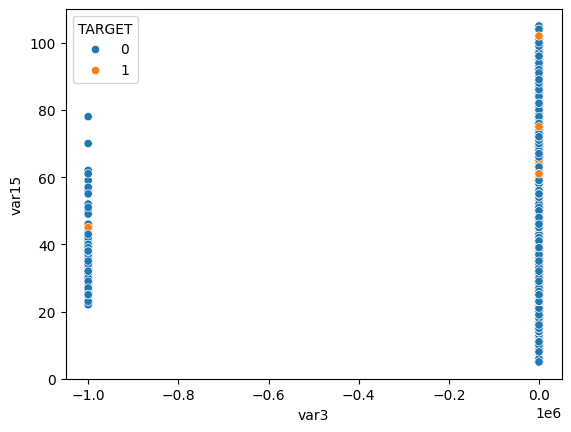

In [10]:
# 1. Distribution of a numeric variable
sns.histplot(df['var38'], kde=True)
plt.show()

# 2. Boxplot for outliers
sns.boxplot(x=df['var15'])
plt.show()

# 3. Correlation heatmap for top variables
sns.heatmap(df.iloc[:, :10].corr(), cmap="viridis")
plt.show()

# 4. Grouping by Target and checking mean
df.groupby("TARGET")["var38"].mean().plot(kind='bar')
plt.show()

# 5. Scatter plot
sns.scatterplot(x="var3", y="var15", hue="TARGET", data=df)
plt.show()


(G) Unique Categories in Target

In [11]:
print(df['TARGET'].value_counts())


TARGET
0    73012
1     3008
Name: count, dtype: int64


(H) Handle Imbalance (Up Sampling)

In [12]:

df_majority = df[df['TARGET']==0]
df_minority = df[df['TARGET']==1]
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=42)
df_balanced = pd.concat([df_majority, df_minority_upsampled])
print(df_balanced['TARGET'].value_counts())


TARGET
0    73012
1    73012
Name: count, dtype: int64


(I) Feature Selection (Pearson Correlation > 65%)

In [13]:

corr_with_target = df.corr()['TARGET'].abs()
selected_features = corr_with_target[corr_with_target > 0.65].index
print("Selected Features:", selected_features.tolist())


Selected Features: ['TARGET']


(J) Feature Selection (Other than Pearson/Variance)

In [14]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop("TARGET", axis=1)
y = df["TARGET"]

mi = mutual_info_classif(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("Top features by Mutual Information:")
print(mi_series.head(10))


Top features by Mutual Information:
num_var42              0.025977
ind_var30              0.025300
ind_var5               0.024198
num_var5               0.023149
num_var5_0             0.019316
num_meses_var5_ult3    0.019088
num_var30              0.017319
ind_var5_0             0.017274
num_var35              0.016216
num_var4               0.016010
dtype: float64


# **Task 04**

In [15]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)
n = 120
data = {
    "Age": np.random.randint(18, 40, n),
    "Gender": np.random.choice(["Male", "Female"], n),
    "Education": np.random.choice(["High School", "Bachelor", "Master", "PhD"], n),
    "Internet_Hours": np.random.randint(1, 12, n),
    "Device": np.random.choice(["Mobile", "Laptop", "Desktop"], n),
    "Coding": np.random.choice(["Yes", "No"], n),
    "Fav_Lang": np.random.choice(["Python", "Java", "C++", "JavaScript", "None"], n),
    "SocialMedia_Hours": np.random.randint(0, 8, n),
    "Online_Shopping": np.random.choice(["Yes", "No"], n),
    "Interested_in_AI": np.random.choice(["Yes", "No"], n)  # Target variable
}

df = pd.DataFrame(data)

print("Synthetic Survey Dataset Created")
df.head()

Synthetic Survey Dataset Created


,Age,Gender,Education,Internet_Hours,Device,Coding,Fav_Lang,SocialMedia_Hours,Online_Shopping,Interested_in_AI
0,24,Male,High School,2,Mobile,Yes,Python,4,Yes,Yes
1,37,Female,Master,6,Laptop,Yes,None,1,Yes,No
2,32,Male,Bachelor,3,Laptop,Yes,JavaScript,1,Yes,Yes
3,28,Male,Bachelor,9,Laptop,No,JavaScript,2,No,Yes
4,25,Male,High School,4,Desktop,No,JavaScript,0,No,No


creating demo data for the task

               Age Gender Education  Internet_Hours  Device Coding Fav_Lang  \
count   120.000000    120       120      120.000000     120    120      120   
unique         NaN      2         4             NaN       3      2        5   
top            NaN   Male       PhD             NaN  Mobile    Yes     None   
freq           NaN     65        42             NaN      45     69       32   
mean     27.950000    NaN       NaN        5.483333     NaN    NaN      NaN   
std       6.399645    NaN       NaN        3.078752     NaN    NaN      NaN   
min      18.000000    NaN       NaN        1.000000     NaN    NaN      NaN   
25%      22.750000    NaN       NaN        3.000000     NaN    NaN      NaN   
50%      27.500000    NaN       NaN        6.000000     NaN    NaN      NaN   
75%      33.000000    NaN       NaN        8.000000     NaN    NaN      NaN   
max      39.000000    NaN       NaN       11.000000     NaN    NaN      NaN   

        SocialMedia_Hours Online_Shopping Intereste

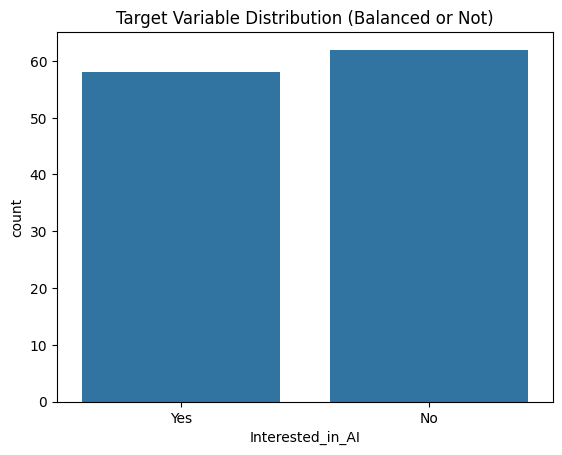

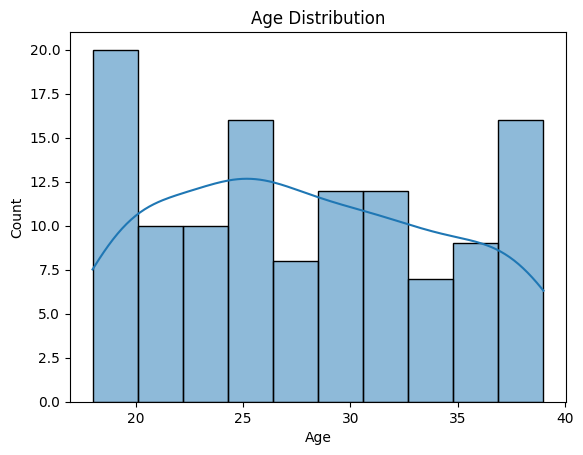

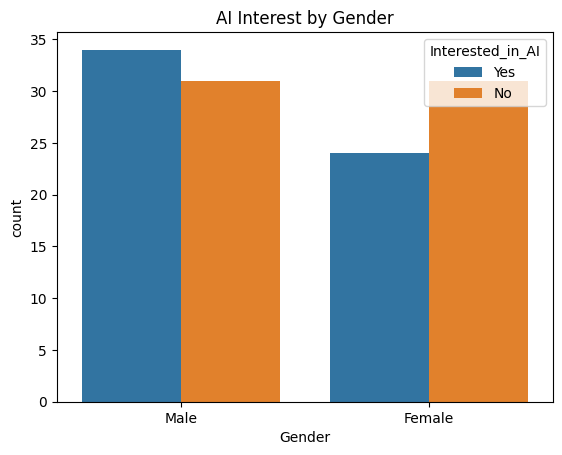

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df.describe(include="all"))

sns.countplot(x="Interested_in_AI", data=df)
plt.title("Target Variable Distribution (Balanced or Not)")
plt.show()

sns.histplot(df["Age"], bins=10, kde=True)
plt.title("Age Distribution")
plt.show()

sns.countplot(x="Gender", hue="Interested_in_AI", data=df)
plt.title("AI Interest by Gender")
plt.show()

In [17]:
target_counts = df["Interested_in_AI"].value_counts()
print("Target distribution:\n", target_counts)

if abs(target_counts[0] - target_counts[1]) > 10:
    print("Dataset is imbalanced")
else:
    print("Dataset looks balanced")

Target distribution:
 Interested_in_AI
No     62
Yes    58
Name: count, dtype: int64
Dataset looks balanced


/tmp/ipython-input-103340362.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(target_counts[0] - target_counts[1]) > 10:


In [18]:
df.loc[random.sample(range(n), 5), "Fav_Lang"] = np.nan

print("Missing values before handling:\n", df.isnull().sum())

# Handle missing (imputation: mode for categorical, mean for numeric)
df["Fav_Lang"].fillna(df["Fav_Lang"].mode()[0], inplace=True)

print("Missing values after handling:\n", df.isnull().sum())

Missing values before handling:
 Age                  0
Gender               0
Education            0
Internet_Hours       0
Device               0
Coding               0
Fav_Lang             5
SocialMedia_Hours    0
Online_Shopping      0
Interested_in_AI     0
dtype: int64
Missing values after handling:
 Age                  0
Gender               0
Education            0
Internet_Hours       0
Device               0
Coding               0
Fav_Lang             0
SocialMedia_Hours    0
Online_Shopping      0
Interested_in_AI     0
dtype: int64


/tmp/ipython-input-1049023108.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fav_Lang"].fillna(df["Fav_Lang"].mode()[0], inplace=True)


In [19]:
from sklearn.utils import resample

majority = df[df["Interested_in_AI"] == "Yes"]
minority = df[df["Interested_in_AI"] == "No"]

minority_upsampled = resample(minority,
                              replace=True,
                              n_samples=len(majority),
                              random_state=42)

df_balanced = pd.concat([majority, minority_upsampled])
print("After balancing:\n", df_balanced["Interested_in_AI"].value_counts())

After balancing:
 Interested_in_AI
Yes    58
No     58
Name: count, dtype: int64


In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

df_encoded = df_balanced.copy()

# Encode categorical features
for col in df_encoded.select_dtypes(include="object").columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop("Interested_in_AI", axis=1)
y = df_encoded["Interested_in_AI"]

chi_scores, p_vals = chi2(X, y)

chi_df = pd.DataFrame({"Feature": X.columns, "Chi2 Score": chi_scores, "p-value": p_vals})
print(chi_df.sort_values(by="Chi2 Score", ascending=False))


Chi-Square test checks whether a categorical feature is dependent on the target.
Higher chi-square score = more important feature.

In [20]:
df_dummies = pd.get_dummies(df_balanced, drop_first=True)
print("Shape after Dummy Encoding:", df_dummies.shape)

Shape after Dummy Encoding: (116, 16)


- One-Hot Encoding: Creates separate columns for each category (e.g., Male → [1,0], Female → [0,1]).
- Dummy Encoding: Drops one column to avoid multicollinearity (reference category).

In [21]:
# Introduce duplicates for demo
df_balanced = pd.concat([df_balanced, df_balanced.iloc[:5]])

print("Duplicates before:", df_balanced.duplicated().sum())

# Technique 1: Drop duplicates
df_no_dupes = df_balanced.drop_duplicates()
print("After drop_duplicates:", df_no_dupes.duplicated().sum())

# Technique 2: Keep first occurrence, remove later ones
df_no_dupes2 = df_balanced[~df_balanced.duplicated(keep="first")]
print("After removing with keep=first:", df_no_dupes2.duplicated().sum())

Duplicates before: 24
After drop_duplicates: 0
After removing with keep=first: 0
